ESERCIZIO 1

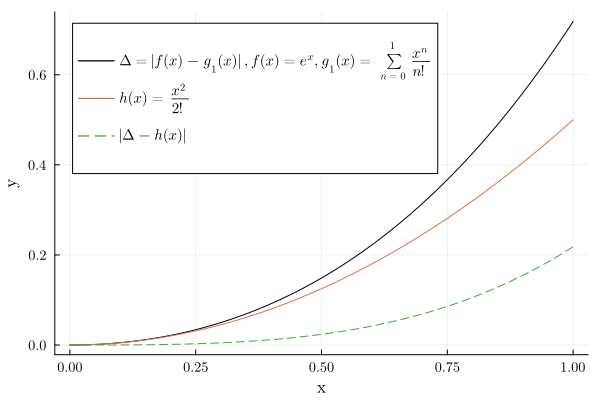

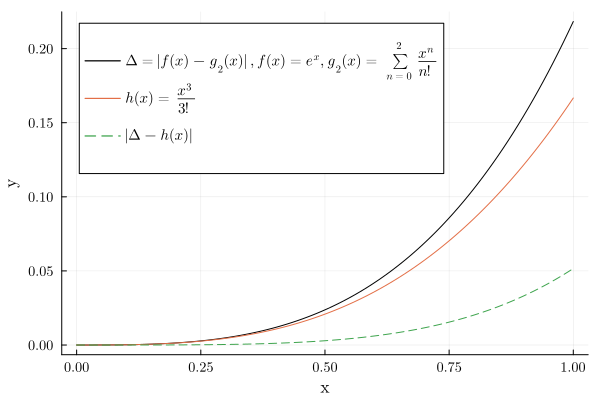

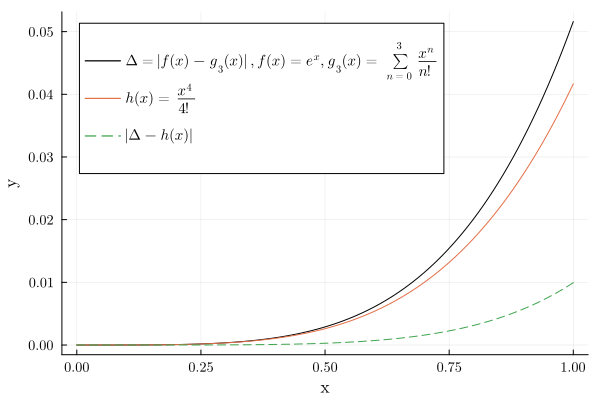

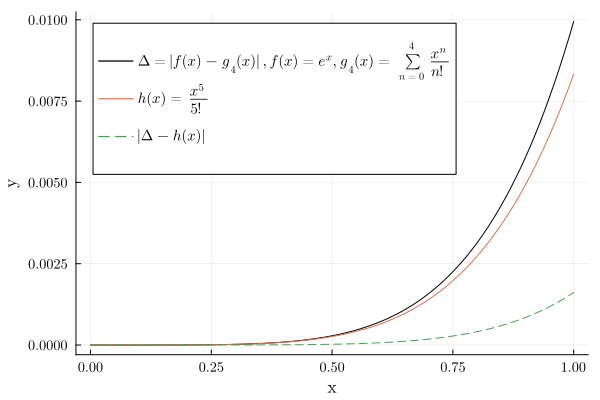

In [10]:

using LinearAlgebra
using Plots, LaTeXStrings
gr()

default(fontfamily = "Computer Modern",
        legendfontsize = 10,
        tickfontsize = 9,
        guidefontsize = 11)

# Definizione delle funzioni
f(x) = exp.(x)

function g(x, N)
    s = zero.(x)
    for n in 0:N
        s .+= x.^n ./ factorial(n)
    end
    return s
end

absolut_error(x, y) = abs.(x .- y)

for N in 1:4
    x = collect(range(0, 1, length=100))
    y1 = absolut_error(f(x), g(x, N))
    y2 = x.^(N+1) ./ factorial(N+1)
    y3 = absolut_error(y1, y2)

    
    p = plot(x, y1,
        label = "\$\\Delta = |f(x)-g_{$N}(x)|, f(x)=e^{x}, g_{$N}(x)=\\sum_{n=0}^{$N}\\frac{x^n}{n!}\$",
        color = :black)
        
    plot!(p, x, y2, 
          label = "\$h(x)=\\frac{x^{$(N+1)}}{$(N+1)!}\$")
          
    plot!(p, x, y3, 
          label = "\$|\\Delta - h(x)|\$", 
          linestyle = :dash)
          
    xlabel!("x")
    ylabel!("y")
    
    display(p)
end


Si confronta la funzione di numpy  dell'esponenziale $f(x) = e^x$ con la funzione di Taylor approssimata al'ordine N  $g_{N}(x) = \sum_{n=0}^{N} \frac{x^n}{n!}$. A tal proposito si graficano la funzione $\Delta = |f(x) - g_{N}(x)|$
per $N = {1, 2, 3, 4}$ e per x che varia tra 0 e 1, con $h(x)=\frac{x^{n+1}}{{n+1}!}$ (per verificare che scalino approssimativamente nello stesso modo). Si osserva come la funzione di Taylor approssima sempre meglio la funzione esponenziale al crescere di N. 
Ma al crescere di x si nota un peggioramento dell'approssimazione, che si riflette in un aumento di $\Delta$ perchè ci sono infiniti altri termini che non vengono considerati nella somma di Taylor. La differenza tra $\Delta$ e $h(x)$ (funzione tratteggiata) è $O(x^{N+2})$ (O grande).